In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import csv

In [2]:
def data_process(file_name):
  data = []
  labels = []
  deriv,seed = {1:[]},{} ## index information about derivative and seed sentences
  pre = '1' ## initialization

  with open(file_name,"r") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
      print(len(line))
      if len(line) == 4:
        data.append([float(i) for i in line[-1].split()])
      else: 
        data.append([float(i) for i in line[3:]])
        
      labels.append(line[2])
      
      # data.append(list(np.float_(line[-384:]))) 
      
      if line[2] == 'seed': 
        seed[int(line[1])] = int(line[0])
      
      if line[1] == pre: 

        deriv[int(line[1])].append(int(line[0]))
      else:
          deriv[int(line[1])] = []

      pre = line[1]

  ## subtract derivation sentences from the seed    
  for i in seed.keys():
    for j in deriv[i]: ## j is row number to be changed
      for k in range(len(data[0])):
        data[j][k] = data[j][k] - data[seed[i]][k]
  return data,labels

In [3]:
# print(deriv.keys())
# print(seed.keys())
# print(deriv[1])

In [4]:
def pca_result(data):
  input = np.array(data)
  pca = PCA(n_components = 30)
  pca.fit(np.transpose(input))
  pca_output = np.transpose(pca.components_)
  return pca_output

In [5]:
def tsne_result(pca_output):
  
  tsne_output = TSNE(n_components=2,learning_rate="auto",init ="random",perplexity=3).fit_transform(pca_output)
  return tsne_output


In [6]:
def visualize(tsne_output,labels):
  data = tsne_output
  target = labels

  x=tsne_output[:,0]
  y=tsne_output[:,1]
  df = pd.DataFrame(data)

  df['target']=target
  df['x']=x
  df['y']=y

  plt.figure(figsize=(16,7))
  sns.scatterplot(x='x',y='y',hue='target',palette=sns.color_palette("hls",14),data=df,
                legend="full")
  plt.show()

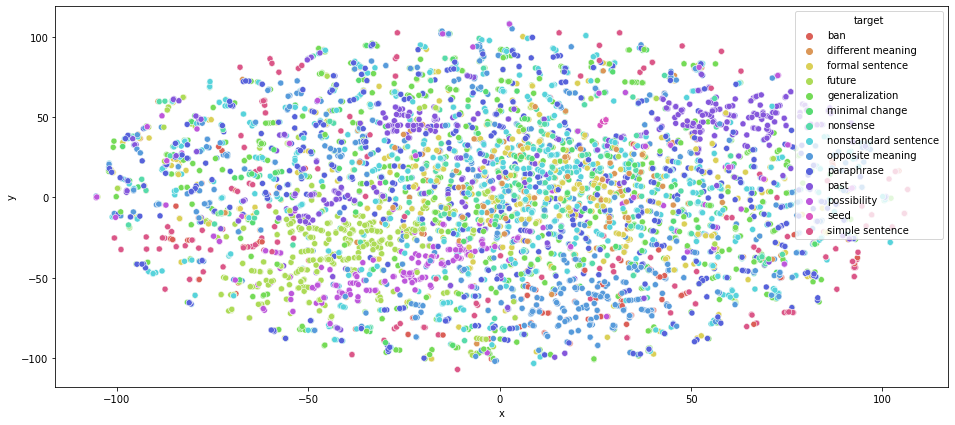

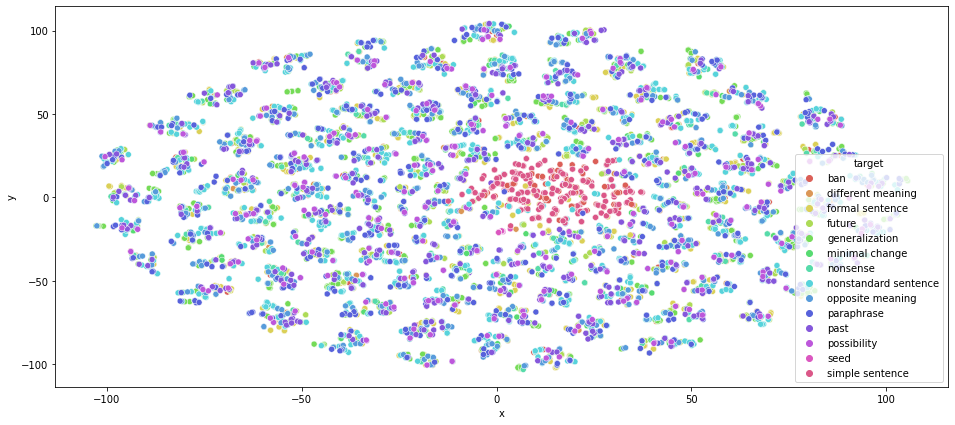

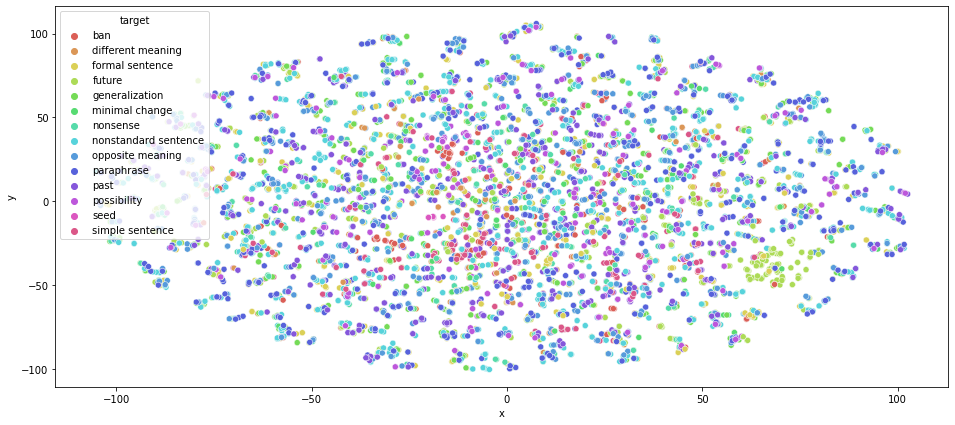

In [10]:

model_2_data,model_2_label = data_process('model_2.tsv')
model_2_result = tsne_result(pca_result(model_2_data))
visualize(model_2_result,model_2_label)

doc2vec_data,doc2vec_label = data_process('doc2vec.tsv')
doc2vec_result = tsne_result(pca_result(doc2vec_data))
visualize(doc2vec_result,doc2vec_label)


doc2vec_2_data,doc2vec_2_label = data_process('doc2vec_2.tsv')
doc2vec_2_result = tsne_result(pca_result(doc2vec_2_data))
visualize(doc2vec_2_result,doc2vec_2_label)